** 1.Create a tensor with requires_grad=True


In [15]:
import torch

In [16]:
x=torch.tensor(5.0,requires_grad=True)

I created a tensor x using PyTorch and set requires_grad=True. This tells PyTorch to keep track of all the operations done using x, so later it can compute the derivative (gradient) of any result that comes from it.

2. Perform a series of operations:

○ z = x**2 + 2x + 3

○ Call z.backward() and print gradients

In [17]:
z=x**2+2*x+3
z

tensor(38., grad_fn=<AddBackward0>)

In [18]:
z.backward()

In [20]:
x.grad

tensor(12.)

I performed a mathematical operation on x to calculate z.
 It builds a computation graph in the background, which links x to z, so that it knows how z depends on x. This is useful because now we can go backward from z to x and compute gradients.I called z.backward() to compute the gradient of z with respect to x. This means PyTorch will now figure out how much z changes when x changes.



3. Try .detach() and explain its purpose



In [37]:
y=torch.tensor(3.0,requires_grad=True)
y

tensor(3., requires_grad=True)

In [29]:
temp=xyz.detach()
temp

tensor(3.)

In [36]:
print(temp.requires_grad)

False


The .detach() function is used when you want to stop a tensor from tracking gradients. It's useful when you want to use a tensor for computation but not include it in gradient calculations, especially during evaluation or debugging.
 After detaching, the new tensor  will have the same value as y, but it doesn’t require gradients anymore. It’s cut off from the computation graph.

In [41]:
with torch.no_grad():
  temp2 = x ** 2
print(temp2.requires_grad)

False


when you want to disable gradient tracking globally like during prediction, where you don’t need to compute gradients. This saves memory and computation..Everything inside the with block is excluded from gradient tracking.

In [43]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [44]:
from torchviz import make_dot

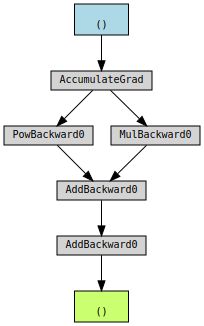

In [45]:
make_dot(z)

For  visualizing the backward graph we use  the torchviz library to  understand how PyTorch tracks operations. First, install torchvizhis using !pip install torchvis will create a PNG image showing the computation graph it helps you  to understand the flow.



6.Write your own custom backward pass for a small computation graph


In [65]:
# Forward pass
w = torch.tensor(5.0,requires_grad=True) # input
y = w ** 2

# Backward pass
grad_y = 1.0                 # dy/dy = 1, seed for backprop
grad_w = 2 * x * grad_y      # dy/dx = 2x

# Results
print("Input x:", x)
print("Output y = x^2:", y)
print("Gradient dy/dx:", grad_w)


Input x: 5.0
Output y = x^2: tensor(25., grad_fn=<PowBackward0>)
Gradient dy/dx: 10.0


PyTorch Training Pipeline Basics

1. Create a custom dataset using torch.utils.data.Dataset.

In [47]:
from torch.utils.data import Dataset

class DummyDataset(Dataset):
    def __init__(self):
        # Create 100 samples of random input and target values
        self.x = torch.randn(100, 1)  # input feature
        self.y = 9 * self.x + 3      # target with a known linear relation

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

 I created a custom dataset class by inheriting from torch.utils.data.Dataset. This allows you to define how your data is stored and how to access individual samples.

2. Use DataLoader to iterate over data in batches

In [49]:
from torch.utils.data import DataLoader
dataset = DummyDataset()
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

The DataLoader wraps our dataset and allows us to load data in mini-batches, which is much more efficient than loading one sample at a time.This will load 10 samples at a time in random order.

3. Define a simple neural network using nn.Module

In [50]:
import torch.nn as nn

class Simplenn(nn.Module):
    def __init__(self):
        super(Simplenn, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input → 1 output

    def forward(self, x):
        return self.linear(x)


Now I defined a basic neural network using nn.Module. For this example, I created a small model with a single nn.Linear layer that maps input x to output y.This model will try to learn the relationship between input x and output y.

4. Implement a training loop with:
○ Forward pass
○ Loss calculation (e.g., MSELoss or CrossEntropyLoss)
○ Backward pass using .backward()
○ Optimizer step

In [ ]:
model = SimpleModel()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


The training loop includes:

Forward pass: Predict outputs.

Loss calculation: Measure how wrong predictions are.

Backward pass: Compute gradients with .backward().

Optimizer step: Adjust model weights.

5. Train the model on dummy data for a few epochs and print the loss.


In [ ]:
for epoch in range(5):
    total_loss = 0
    for batch_x, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Now I trained the model using the dummy dataset for 5 epochs. Each epoch means passing through the entire dataset once. During training, I printed the loss to monitor how well the model is learning.